In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('Acoustic_Extinguisher_Fire_Dataset.csv')
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [4]:
df['FUEL'] = encoder.fit_transform(df['FUEL'])
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [5]:
X = df.iloc[:,:6]
Y = df.iloc[:,6]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [7]:

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)


In [8]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9587234855723294


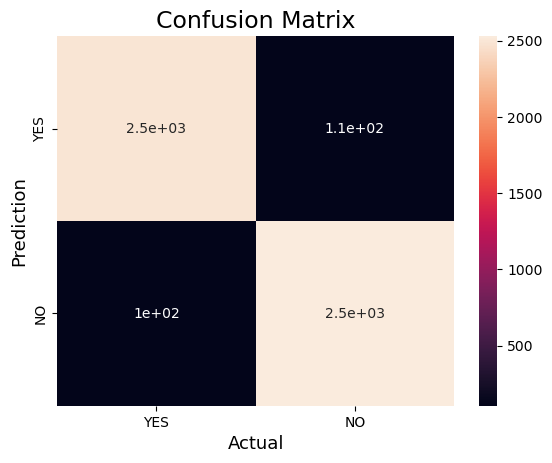

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,
            annot=True,
            xticklabels=['YES','NO'],
            yticklabels=['YES','NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

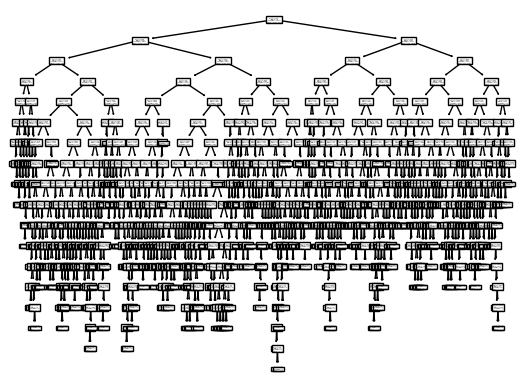

In [10]:
plot_tree(clf)
plt.show()